# Divide And Conquer Sorting Algorithms
Purpose: To focus on the implementation of sorting algorithms and analyzing their performance both mathematically (using theoretical arguments on the asymptotic behavior of algorithms ) and experimentally (i.e., running experiments for different input arrays and plotting relevant performance results). 

# K-Way Merge Sort

In [1]:
c0 = 0 #initializing global step counters for functions
c1 = 0
c2 = 0
c3 = 0

def resetCounters(): #resetting counters value to zero for reuse
    global c0
    global c1
    global c2
    global c3
    c0,c1,c2,c3 = 0,0,0,0

In [2]:
def Merge(lst, l, m, r):
    global c0 #counter for this function
    
    newlist = [m[0] - l + 1] #new list with length of subarray size
    
    for mi in range (1, len(m)): #looping the elements of subarray
        c0+=1 #step count
        newlist.append(m[mi] - m[mi-1]) #subtracting previous element from middle and appending
    
    newlist.append(r - m[-1]) #subtracting final element from right index and appending                 
    arr = [[0]*newlist[i] for i in range(len(newlist))] #creating same length array with zeros as element
    
    c0+=len(newlist) #step count for the for loop in line above

    for i in range (0, newlist[0]): #looping over subarray length elements
        c0+=1 #step count
        arr[0][i] = lst[l+i] #pick elements from actual array to the previous elements                
    
    for arr_idx in range(1, len(arr)): #loop to replace elements
        c0+=1 #step count
        
        for idx in range(0, newlist[arr_idx]):
            c0+=1
            arr[arr_idx][idx]=lst[m[arr_idx-1]+ idx+1]
    
    for x in arr: #adding infinity as last element to make it the biggest element in the list to sort
        c0+=1 #step count
        x.append(float("inf"))                    
    
    idxArr = [0]*(len(arr)) #array which will store the keys
    c0+=len(arr) #step count
    
    for key in range (l, r+1):
        c0+=1 #step count 
        mn = arr[0][idxArr[0]] #assumption: subarray 1 containes next already sorted key
        lst[key] = mn
        idxArr[0]+=1
        final = 0
                        
        for arr_idx in range(1, len(arr)): #checking what we assumed
            c0+=1 #step count
            curr = arr[arr_idx][idxArr[arr_idx]] #the current key
            
            if curr < mn: # if the current key value is less than minimum
                c0+=1 #step count
                mn = curr #replacing
                idxArr[arr_idx] += 1 #storing index
                idxArr[final] -= 1 #poping the final element
                final = arr_idx #updating the final index

        lst[key] = mn
    return lst

In [3]:
def kMerge(lists, l, r, k=3):
   
    global c1 #step counter for this function
    kmx = r-l+1 #max no.of subarray that the code will initialize 
    c1+=1 #step count for the if else below
    
    if kmx <= 1: #if the array has one or less elements, stop function
        return
    
    else:
        if kmx < k: #if k is larger the value of array size, we use default k
            k = 3 #default k
            c1 +=1 #step count for the if
        
        mid_idx = [((_*(r-l))//k) + l for _ in range(1,k)] #searching for mid index(s)
        c1+=k #step count
        kMerge(lists, l, mid_idx[0], k) #recursive
        kMerge(lists, mid_idx[-1] +1, r, k)
        
        for mi in range(1, len(mid_idx)):
            c1+=1 #step count
            kMerge(lists, mid_idx[mi-1] +1, mid_idx[mi], k)
            
    return Merge(lists, l, mid_idx, r)

In [4]:
assert kMerge([3,4,5,2,1,8,7,9,6],0,8) == [1,2,3,4,5,6,7,8,9] #testing

#sortedarray
resetCounters()
print(kMerge([1,2,3,4,5,6,7,8,9], 0, 5, 3))

#somewhatsortedarray
resetCounters()
print(kMerge([1,4,3,2,6,5,9,7,8], 2, 7, 3)) #sorting subarray only from index 2 to 7

#large sizeinput
resetCounters()
kMerge(([9,1,2,4,3,7]*1000), 0, 5999, 3)

print("Tested")

[1, 2, 3, 4, 5, 6, 7, 8, 9]
[1, 4, 2, 3, 5, 6, 7, 9, 8]
Tested


### Implement a second version of a k-way merge sort that calls selection sort when sublists are below a certain length (of your choice) rather than continuing the subdivision process. 

In [5]:
def Sort(A): #Selection Sort
    global c2 #step counter
    
    for i in range(len(A)):
        mn = i #current min element
        c2+=1 #step count
        
        for j in range(i+1, len(A)): #looping through each element
            c2+=1 #step count
            
            if A[mn] > A[j]: #checking if we have a new min element
                c2+=1 #step count
                mn = j #updating min element
        
        tmp = A[i] #swapping
        A[i] = A[mn]
        A[mn] = tmp
    return A #returning sorted array

In [6]:
assert Sort([3,4,5,2,1,8,7,9,6]) == [1,2,3,4,5,6,7,8,9] #testing

##### extended three way merge

In [7]:
def extendedThreeWayMerge(lists, l, r, k=3): 
    '''
    This function takes the same arguments as Three-Way MergeSort but 
    uses SelectionSort to sort a given number of array length.
    '''
    global c3
    kmx = r-l+1  #the code cannot create more than this number of sublists
    c3+=1 #step count
    
    if kmx <= 1: #if list is not longer than one, no divisions can be made
        return
    elif kmx <= 100: #the 100 is the threshold when we start using selection sort
        Sort(lists)
    #if the input of subdivisions is larger than maximum allowed  
    else:
        if kmx <k: # then set k to the default value
            k=3

    midx = [((_*(r-l))//k) + l for _ in range(1,k)]     #middle indices
    
    c3+=k #step coun
    
    kMerge(lists, l, midx[0], k)     #call the function to divide and merge
    kMerge(lists, midx[-1] +1, r, k)
    
    for mi in range(1, len(midx)):
        c3 +=1 #step count
        kMerge(lists, midx[mi-1] +1, midx[mi], k)
        
    return Merge(lists, l, midx, r)

In [8]:
assert extendedThreeWayMerge([3,4,5,2,1,8,7,9,6],0,8) == [1,2,3,4,5,6,7,8,9] #testing

#sortedarray
resetCounters()
print(extendedThreeWayMerge([1,2,3,4,5,6,7,8,9], 0, 5, 3))

#somewhatsortedarray
resetCounters()
extendedThreeWayMerge([1,4,3,2,6,5,9,7,8], 2, 7, 3)

#large sizeinput
resetCounters()
extendedThreeWayMerge(([9,1,2,4,3,7]*1000), 0, 5999, 3)

print("Tested")

[1, 2, 3, 4, 5, 6, 7, 8, 9]
Tested


# Bucket Sort
Bucket sort (or Bin sort) is an algorithm that takes as inputs an  n -element array and the number of buckets,  k , to be used during sorting. Then, the algorithm distributes the elements of the input array into  k -different buckets and proceeds to sort the individual buckets. Then, merges the sorted buckets to obtained the sorted array. 

The BucketSort above calls the function GetBucketNum (see the pseudocode below) to distribute all the elements of array  A  into  k -buckets. Every element in the array is assigned a bucket number based on its value (positive or negative numbers). GetBucketNum returns the bucket number that corresponds to element  A[i] . It takes as inputs the element of the array,  A[i] , the max and min elements in  A , the size of the intervals in every bucket (e.g., if you have numbers with values between 0 and 100 numbers and 5 buckets, every bucket has an interval of size  20=[100−0]/5 ). Notice that in pseudocode the indices of the arrays are from 1 to  n . Thus, GetBucketNum consistently returns a number between 1 and  n 

#### Python 3 implementation of BucketSort that uses the selection sort algorithm for sorting the individual buckets

In [9]:
import math
import random

def bucketSort(lst, k):
    """Implements BucketSort
    
    Input:
    lst: a Python list OR numpy array (your code should work with both of these data types)
    k: int, length of lst
    
    Output: a sorted Python list"""
    
    #find minimum and maximum values in the list to choose the size
    mn = min(lst)
    mx = max(lst)
    sz = math.ceil(((mx-mn)/k))  

    sortedArray = [] #empty list to store the sorted array  

    Buckets = [0]*k #another list with the number of buckets
    
    for i in range(k): #iterate over the number of buckets 
        Buckets[i] = [] #change empty list with given index

    for i in lst:  #iterate over the list
        b = GetBucketNum(i,mn,mx,sz,k) #get the number of buckets
        Buckets[b].append(i) #add to the buckets list
    for i in range(k):
        Buckets[i] = Sort(Buckets[i]) #sort the bucket

    for i in Buckets:
        for j in i: 
            sortedArray.append(j) #appending to array
    return sortedArray

def GetBucketNum(a,mn,mx,sz,k):
    if a == mx: #is a the maximum? if so, substract k by one
        j = k-1
    elif a == mn:  #is it equal? if so, intialize k to 0
        j = 0
    else: #in all the other cases, j is 0
        j = 1
        while a > mn+(sz*j):
            j = j+1
        j=j-1
    return j

A = random.sample(range(1000), 100)
print(bucketSort(A,10)) #testing

[12, 15, 30, 37, 39, 51, 60, 64, 66, 72, 110, 116, 134, 137, 144, 149, 158, 163, 193, 200, 208, 240, 241, 254, 261, 264, 276, 291, 298, 301, 303, 320, 340, 341, 345, 380, 392, 399, 409, 416, 417, 427, 435, 445, 452, 457, 469, 486, 489, 490, 510, 519, 520, 529, 542, 550, 568, 578, 581, 598, 601, 632, 634, 635, 636, 650, 660, 664, 666, 672, 677, 700, 703, 706, 714, 727, 744, 750, 763, 768, 772, 778, 780, 782, 785, 805, 812, 815, 827, 834, 861, 879, 883, 896, 898, 900, 943, 949, 976, 988]


In [10]:
assert bucketSort([3,4,5,2,1],3) == [1,2,3,4,5] #testing

#### Implementing a second version of the BucketSort algorithm. This time instead of selection sort within BucketSort, we will use the Bucket sort recursively until the size of the bucket is less than or equal to k, the base case for the recursion.

In [11]:
def extendedBucketSort(lst, k):
    """Implements the second version of the BucketSort algorithm
    
    Input:
    lst: a Python list OR numpy array (your code should work with both of these data types)
    k: int, length of lst
    
    Output: a sorted Python list"""
    mn = min(lst) #minimum element from the list
    mx = max(lst) #maximum element from the list
    sz = math.ceil((mx-mn)/k) #generating size of buckets

    sortedArray = [] #empty array to store the sorted list

    Buckets = [0]*k
    for i in range(k):
        Buckets[i] = []

    for i in lst:
        b = GetBucketNum(i,mn,mx,sz,k) #finding what bucket to put the element
        Buckets[b].append(i) #putting into the bucket number found
    for p in range(k):
        if Buckets[p] != []:
            Buckets[p] = bucketSort(Buckets[p],2*k-p) #instead of selectionsort in above, we use bucketsort to sort the buckets

    for i in Buckets:
        for j in i:
            sortedArray.append(j) #taking sorted bucket by bucket and merging them to form the final sorted array
    return sortedArray

    raise NotImplementedError()

In [12]:
assert extendedBucketSort([3,4,5,2,1,8,7,9,6],10) == [1,2,3,4,5,6,7,8,9] #testing

#### Analyzing and comparing the practical run times of regular k-way merge sort (i.e., two-way merge sort), three-way merge sort, and the extended merge sort from (3) by producing a plot that illustrates how every running time and number of steps grows with input size.

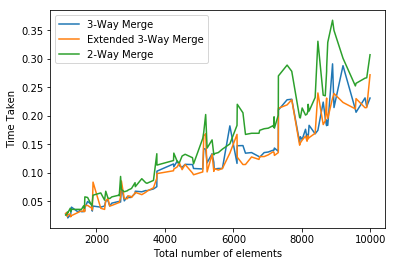

In [16]:
import time #importing required libraries
import numpy as np
import matplotlib.pyplot as plt 

curve1_x, curve1_y, curve2_x, curve2_y, curve3_x, curve3_y = [],[],[],[],[],[] #initializng points for graph 1 time vs elements
curve4_y, curve5_y, curve6_y = [],[],[] #to store y axis points for step counters

elements_count = np.random.randint(1000, 10000, 100) #getting random int as element count
elements_count = Sort(elements_count) #sorting the element count to plot proper graph

    
for z in elements_count:
    array = list(range(z))
    np.random.shuffle(array)
    
    resetCounters() #resetting counters = 0
    start = time.time() #time before 3way merge function execution
    kMerge(array,0,z-1,3) #three way merge function execution
    stop = time.time() #time after 3 way merge function execution
    curve1_y.append(stop-start) #getting axis points for curve 1
    curve1_x.append(z) #storing no. of elements
    curve4_y.append(c0+c1) #summing up the counters of all functions executed in three way merge
    
    resetCounters() #resetting counters = 0
    start = time.time() #time before function execution
    extendedThreeWayMerge(array,0,z-1,3) #kmerge with k = 3
    stop = time.time() #time after function execution
    curve2_y.append(stop-start) #getting axis points for curve 1
    curve2_x.append(z) #storing no. of elements
    curve5_y.append(c0+c1+c2+c3) #summing up the counters of all functions executed in extended 3 way merge
    
    resetCounters() #resetting counters = 0
    start = time.time() #time before function execution
    kMerge(array,0,z-1,2) #two way merge
    stop = time.time() #time after function execution
    curve3_y.append(stop-start) #getting axis points for curve 1
    curve3_x.append(z) #storing no. of elements
    curve6_y.append(c0+c1) #summing up the counters of all functions executed in two merge
    
plt.plot(curve1_x,curve1_y, label = "3-Way Merge") #plotting graph
plt.plot(curve2_x,curve2_y, label = "Extended 3-Way Merge") #plotting graph
plt.plot(curve3_x,curve3_y, label = "2-Way Merge") #plotting graph
plt.xlabel("Total number of elements")
plt.ylabel("Time Taken")
plt.legend()
plt.show()

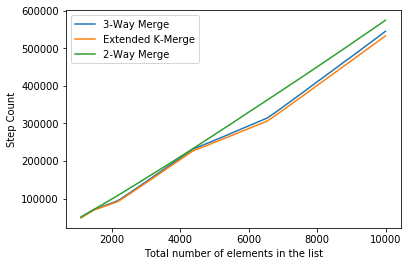

In [17]:
plt.plot(curve1_x,curve4_y, label = "3-Way Merge") #plotting graph for 3 way merge
plt.plot(curve2_x,curve5_y, label = "Extended K-Merge") #plotting graph extended 3 way merge
plt.plot(curve3_x,curve6_y, label = "2-Way Merge") #plotting graph for 2 way merge
plt.xlabel("Total number of elements in the list")
plt.ylabel("Step Count")
plt.legend()
plt.show()

**Merge Complexity**

Nested for-loops run k-times, that represents the number of subarrays. The complexity, averagely, is $\Theta(k*n)$. 


If k is equal to n, the complexity moves to $\Theta(n^2)$, worst-case:$O(n^2)$ .


Normally, its complexity is $\Omega(n)$.



**K-Way MergeSort**

K-way MergeSort divides and sorts the list in k-number. The list may be divided up to the extent where each element is a list itself (k=n). The function calls itself, which makes it recursive.

$$T(n) = k*T(n/k) + \Theta(n).$$

Apply master theorem -> a=b=k, we get: $$n^{\log_ba} = n^{\log_kk} = n.$$ from which we can extract to:

$T(n) = \Theta(n^{\log_ba}*\log_k n) = \Theta(n*\log_k n)$.

**Three-Way MergeSort and Two-Way MergeSort**

In this case, k is 3 or 2. So, we just substitute for k in the formula above.

**Three-Way MergeSort**

$$T(n) = 3T(n/3) + O(n)  {\displaystyle \Rightarrow }  
O (n log_3 n) $$




**Two-Way MergeSort**

$$T(n) = 2T(n/2) + O(n)  {\displaystyle \Rightarrow } 
O (n log_2 n)$$

**Extended Three-Way MergeSort**

In this case, we use Three-Way MergeSort, by integrating selection sort algorithm when the k is in a given threshold. Th number of subarrays defines its complexity. It will be similar to Three-Way MergeSort, when the selection sorting algorithm is not use d (k>threshold). When Selection Sort is called, it adds to the time complexity and makes the algorithm slower (k>=threshold).


### Analyzing and comparing the practical run times of regular merge sort (i.e., two-way merge sort), Bucket sort and recursive sort, by producing a plot that illustrates how each running time grows with input size.

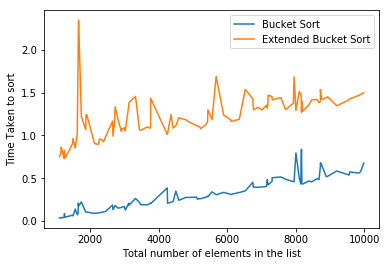

In [18]:
curve1_x, curve1_y, curve2_x, curve2_y = [],[],[],[] #initializing to hold x/y axis points

for z in elements_count:
    array = list(range(z))
    np.random.shuffle(array)
    start = time.time() #time before bucket sort function execution
    bucketSort(array,1000) #function executing
    stop = time.time() #time after function finished executing
    curve1_y.append(stop-start) #storing time taken
    curve1_x.append(z) #storing number of elements corresponding bucket sort function worked on
    start = time.time() #time before extended bucket sort function execution
    extendedBucketSort(array,1000) #function executing
    stop = time.time() #time after function finished executing
    curve2_y.append(stop-start) #getting axis points for extended bucket sort
    curve2_x.append(z) #storing corresponding number of elements extended bucket sort function worked on
    
plt.plot(curve1_x,curve1_y, label = "Bucket Sort") #plotting graph
plt.plot(curve2_x,curve2_y, label = "Extended Bucket Sort") #plotting graph
plt.xlabel("Total number of elements in the list")
plt.ylabel("Time Taken to sort")
plt.legend()
plt.show()